# Word Similarity and Visualization
On this notebook are some visualization of last notebooks, with cosine similarity and more.

In [1]:
#importar librerias
import nltk
import numpy as np
from nltk.tokenize import TweetTokenizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
# 📌 This notebook assumes that corpus processing, tokenization and BoW construction was already performed on the notebook:
# 👉 'feature-extraction/bag_of_words.ipynb'

#The variables used here (such as `BoW_tr`, `tr_txt`, `V1`, `dict_indices1`) were built there.
#If you want to re-run the pipeline from scratch, check that file first.

> 🔗 **Note:** The corpus loading, tokenization and construction of the Bag of Words is at
> [`bag_of_words.ipynb`](./feature-extraction/bag_of_words.ipynb)

## Cosine Similarity

In [3]:
from sklearn.metrics.pairwise import cosine_similarity

# Matriz de similitud entre todos los documentos
sim_matrix = cosine_similarity(BoW_tr)

print("Similitud entre tweet 0 y tweet 1:", sim_matrix[0, 1])
print("Matriz de similitud forma:", sim_matrix.shape)

Similitud entre tweet 0 y tweet 1: 0.04428074427700476
Matriz de similitud forma: (5278, 5278)


In [4]:
import numpy as np

def cosine_similarity_manual(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    
    if norm1 == 0 or norm2 == 0:
        return 0.0  # evitar división por cero
    return dot_product / (norm1 * norm2)

In [5]:
i, j = 0, 1  # índices de los tweets a comparar

vec_i = BoW_tr[i]
vec_j = BoW_tr[j]

sim = cosine_similarity_manual(vec_i, vec_j)
print(f"Similitud coseno entre tweet {i} y {j}: {sim:.4f}")


Similitud coseno entre tweet 0 y 1: 0.0443


##

## WordCloud

In [6]:
from wordcloud import WordCloud
from collections import Counter

In [1]:
# 📌 This notebook assumes that compute_gain is already done, if not look in 
# 👉 'feature-extraction/information_gain.ipynb'


In [9]:
corpus_palabras = [token for doc in tr_txt for token in tokenizer.tokenize(doc)]


In [10]:
fdist1 = nltk.FreqDist(corpus_palabras)
V2 = list(fdist1.keys())
BoW_tr_frq = build_bow_tfidf(tr_txt, V2, dict_indices1)

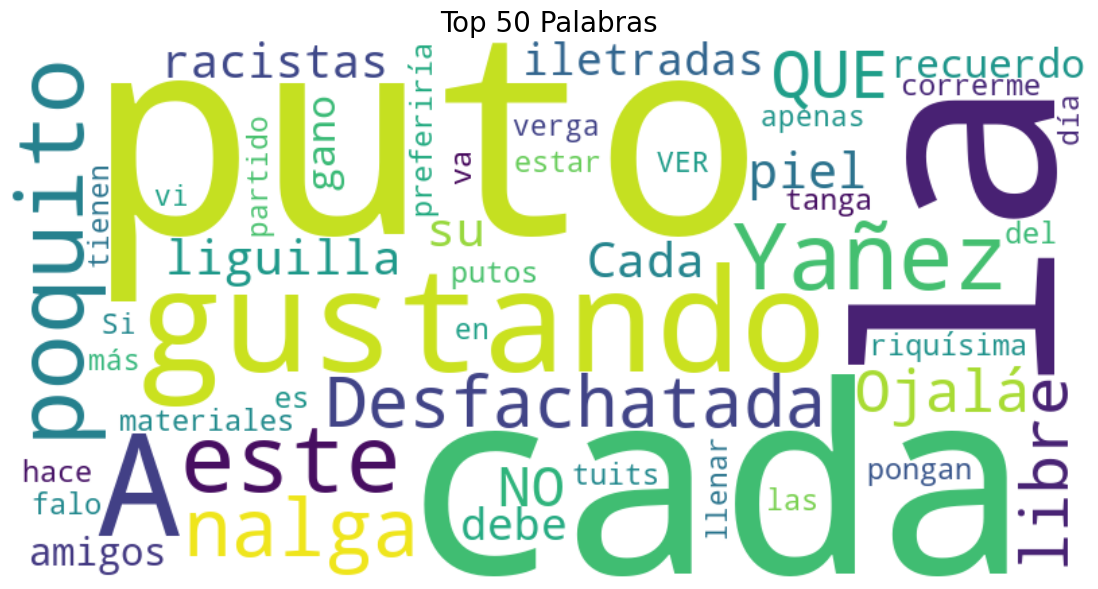

In [11]:
IG_scores = compute_gain(BoW_tr_frq, tr_y, V2)
K=50
top_words = dict(sorted(IG_scores.items(), key=lambda x: x[1], reverse=True)[:50])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Top 50 Palabras", fontsize=20)
plt.axis('off')
plt.show()

## Projection with stopwords


In [ ]:
# 📌 This notebook assumes that random_index is already done, if not look in 
# 👉 'word-representation/random_indexing.ipynb'

In [13]:
V = list(dict_indices1.keys())                               #length of the vocabulary
reduced_matrixRI = random_index(BoW_tr, V, dimension=300)    
tsne = TSNE(n_components=2, perplexity=30, random_state=42)  #reduce the dimensionality to a 2D space visualization
reduced_matrixRI = tsne.fit_transform(reduced_matrixRI)   

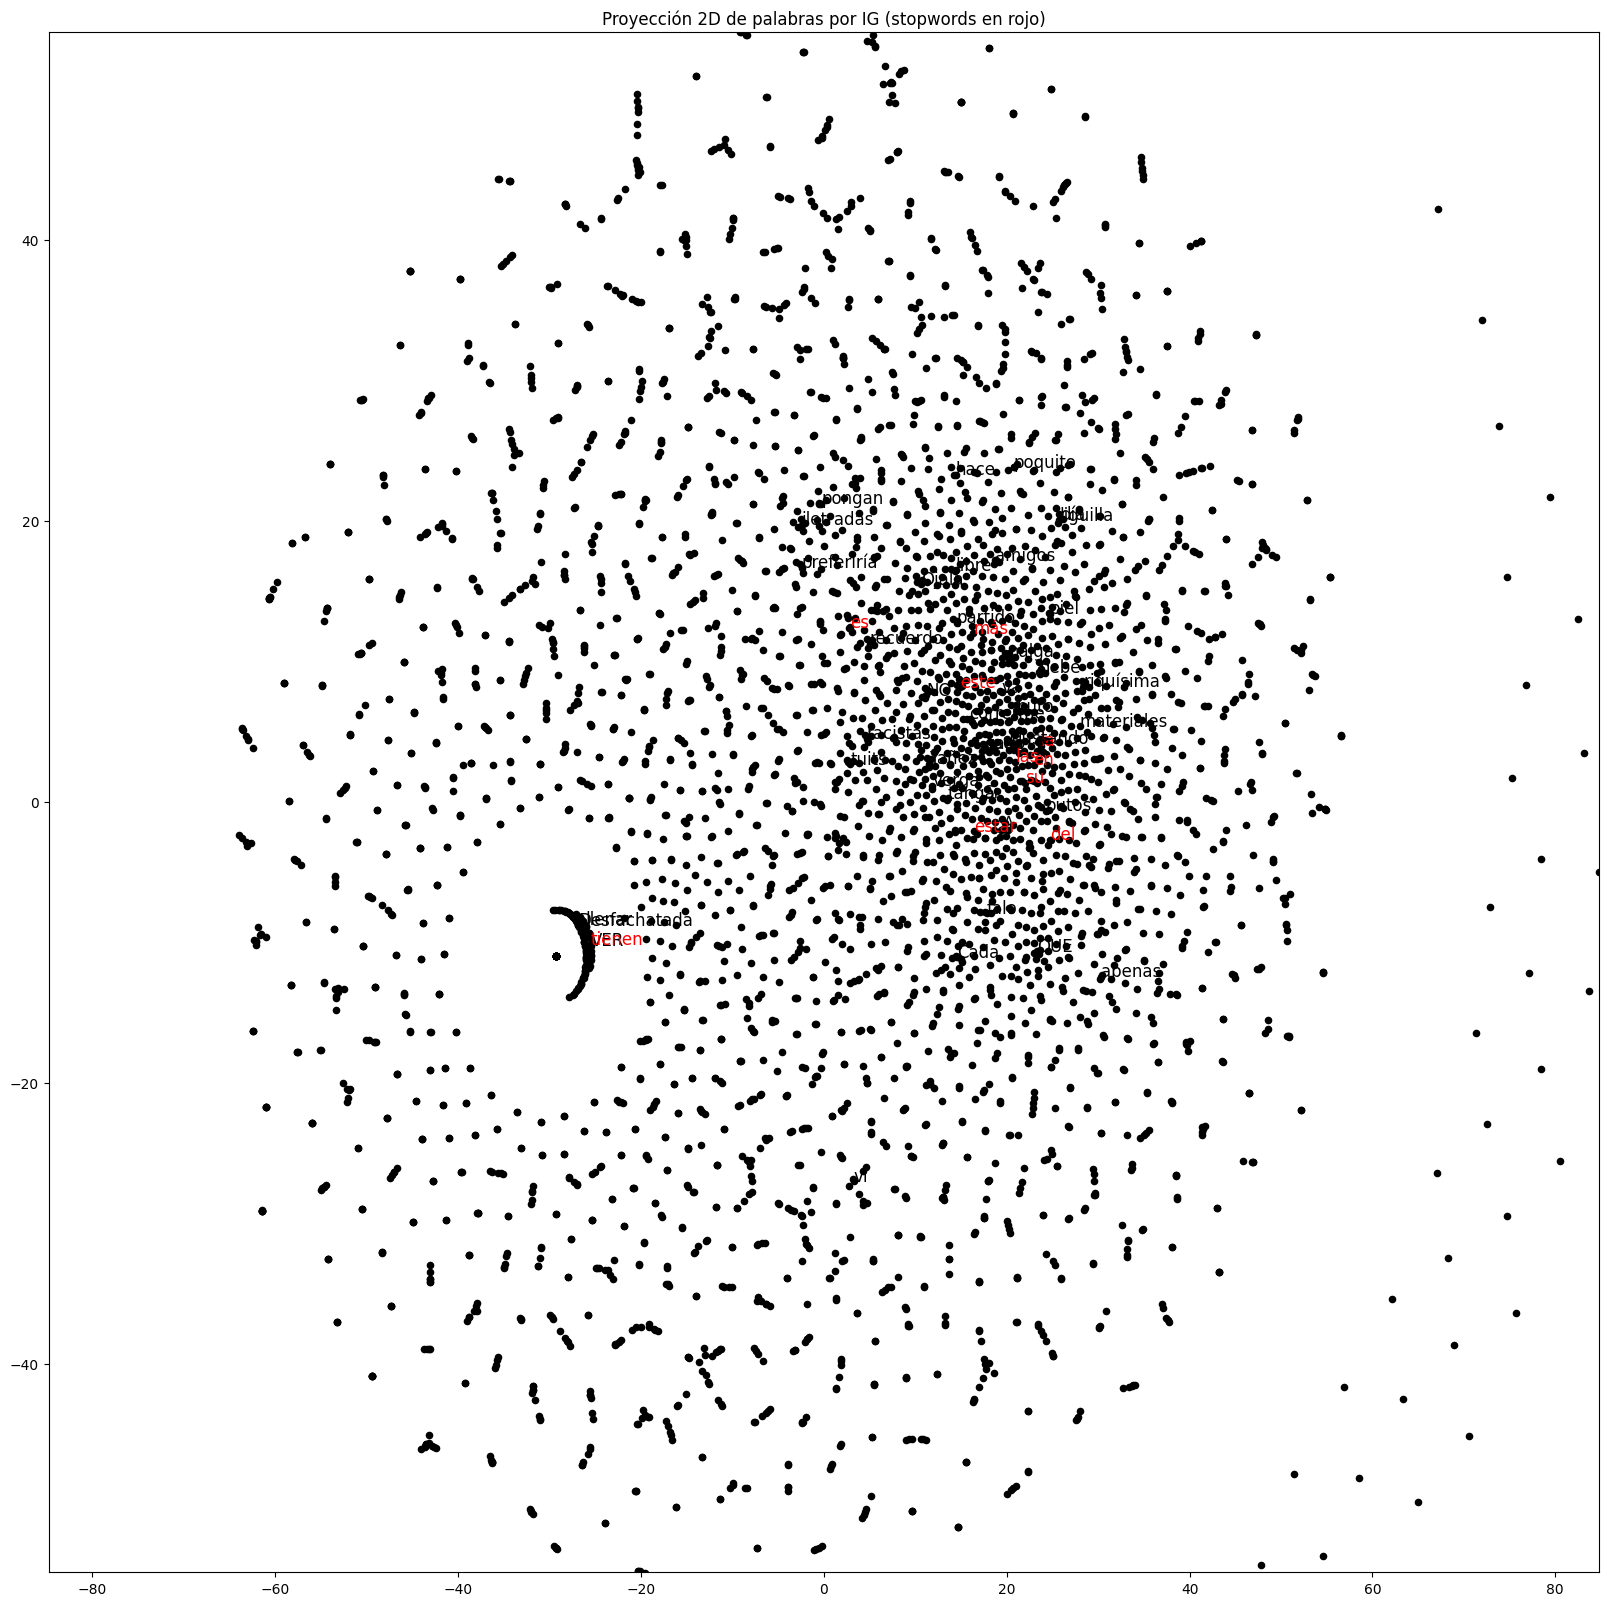

In [14]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import numpy as np

sw = set(stopwords.words('spanish'))

# Proyección máxima para escala del gráfico
max_x = np.max(reduced_matrixRI[:, 0])
max_y = np.max(reduced_matrixRI[:, 1])

plt.figure(figsize=(20, 20), dpi=100)
plt.xlim((-max_x, max_x))
plt.ylim((-max_y, max_y))
plt.scatter(reduced_matrixRI[:, 0], reduced_matrixRI[:, 1], 20, color='black')

for idx, word in enumerate(top_words):
    x, y = reduced_matrixRI[idx]
    color = 'red' if word in sw else 'black'
    plt.annotate(word, (x, y), color=color, fontsize=12)

plt.title("Proyección 2D de palabras por IG (stopwords en rojo)")
plt.show()


## Arrow graph

In [ ]:
# 📌 This notebook assumes that compute_tcor and chiSquare is already done, if not look in 
# 👉 'feature-extraction/chi_squared_tcor.ipynb)'

In [24]:
TCOR_base = compute_tcor(BoW_tr)
print("Matriz TCOR calculada con dimensiones:", TCOR_base.shape)

Matriz TCOR calculada con dimensiones: (5000, 5000)


In [26]:
k=1000
chi2s = chiSquare(BoW_tr, tr_y)
best_idx = np.argsort(chi2s)[-k:]
dict_indices_invertido = {v: k for k, v in dict_indices1.items()}
target_words = [dict_indices_invertido[index] for index in best_idx]
t_words = target_words
target_matriz = np.array([TCOR_base[dict_indices1[word]] for word in t_words])
print(target_matriz.shape)


(1000, 5000)


In [27]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
reduced_matrix = tsne.fit_transform(target_matriz)

In [30]:
import re

def contiene_emojis(texto):
    return bool(re.search(r'[^\w\sáéíóúñÁÉÍÓÚÑ]', texto))  # detecta símbolos/emojis

# Filtra palabras antes de graficar
t_words = [word for word in t_words if not contiene_emojis(word)]

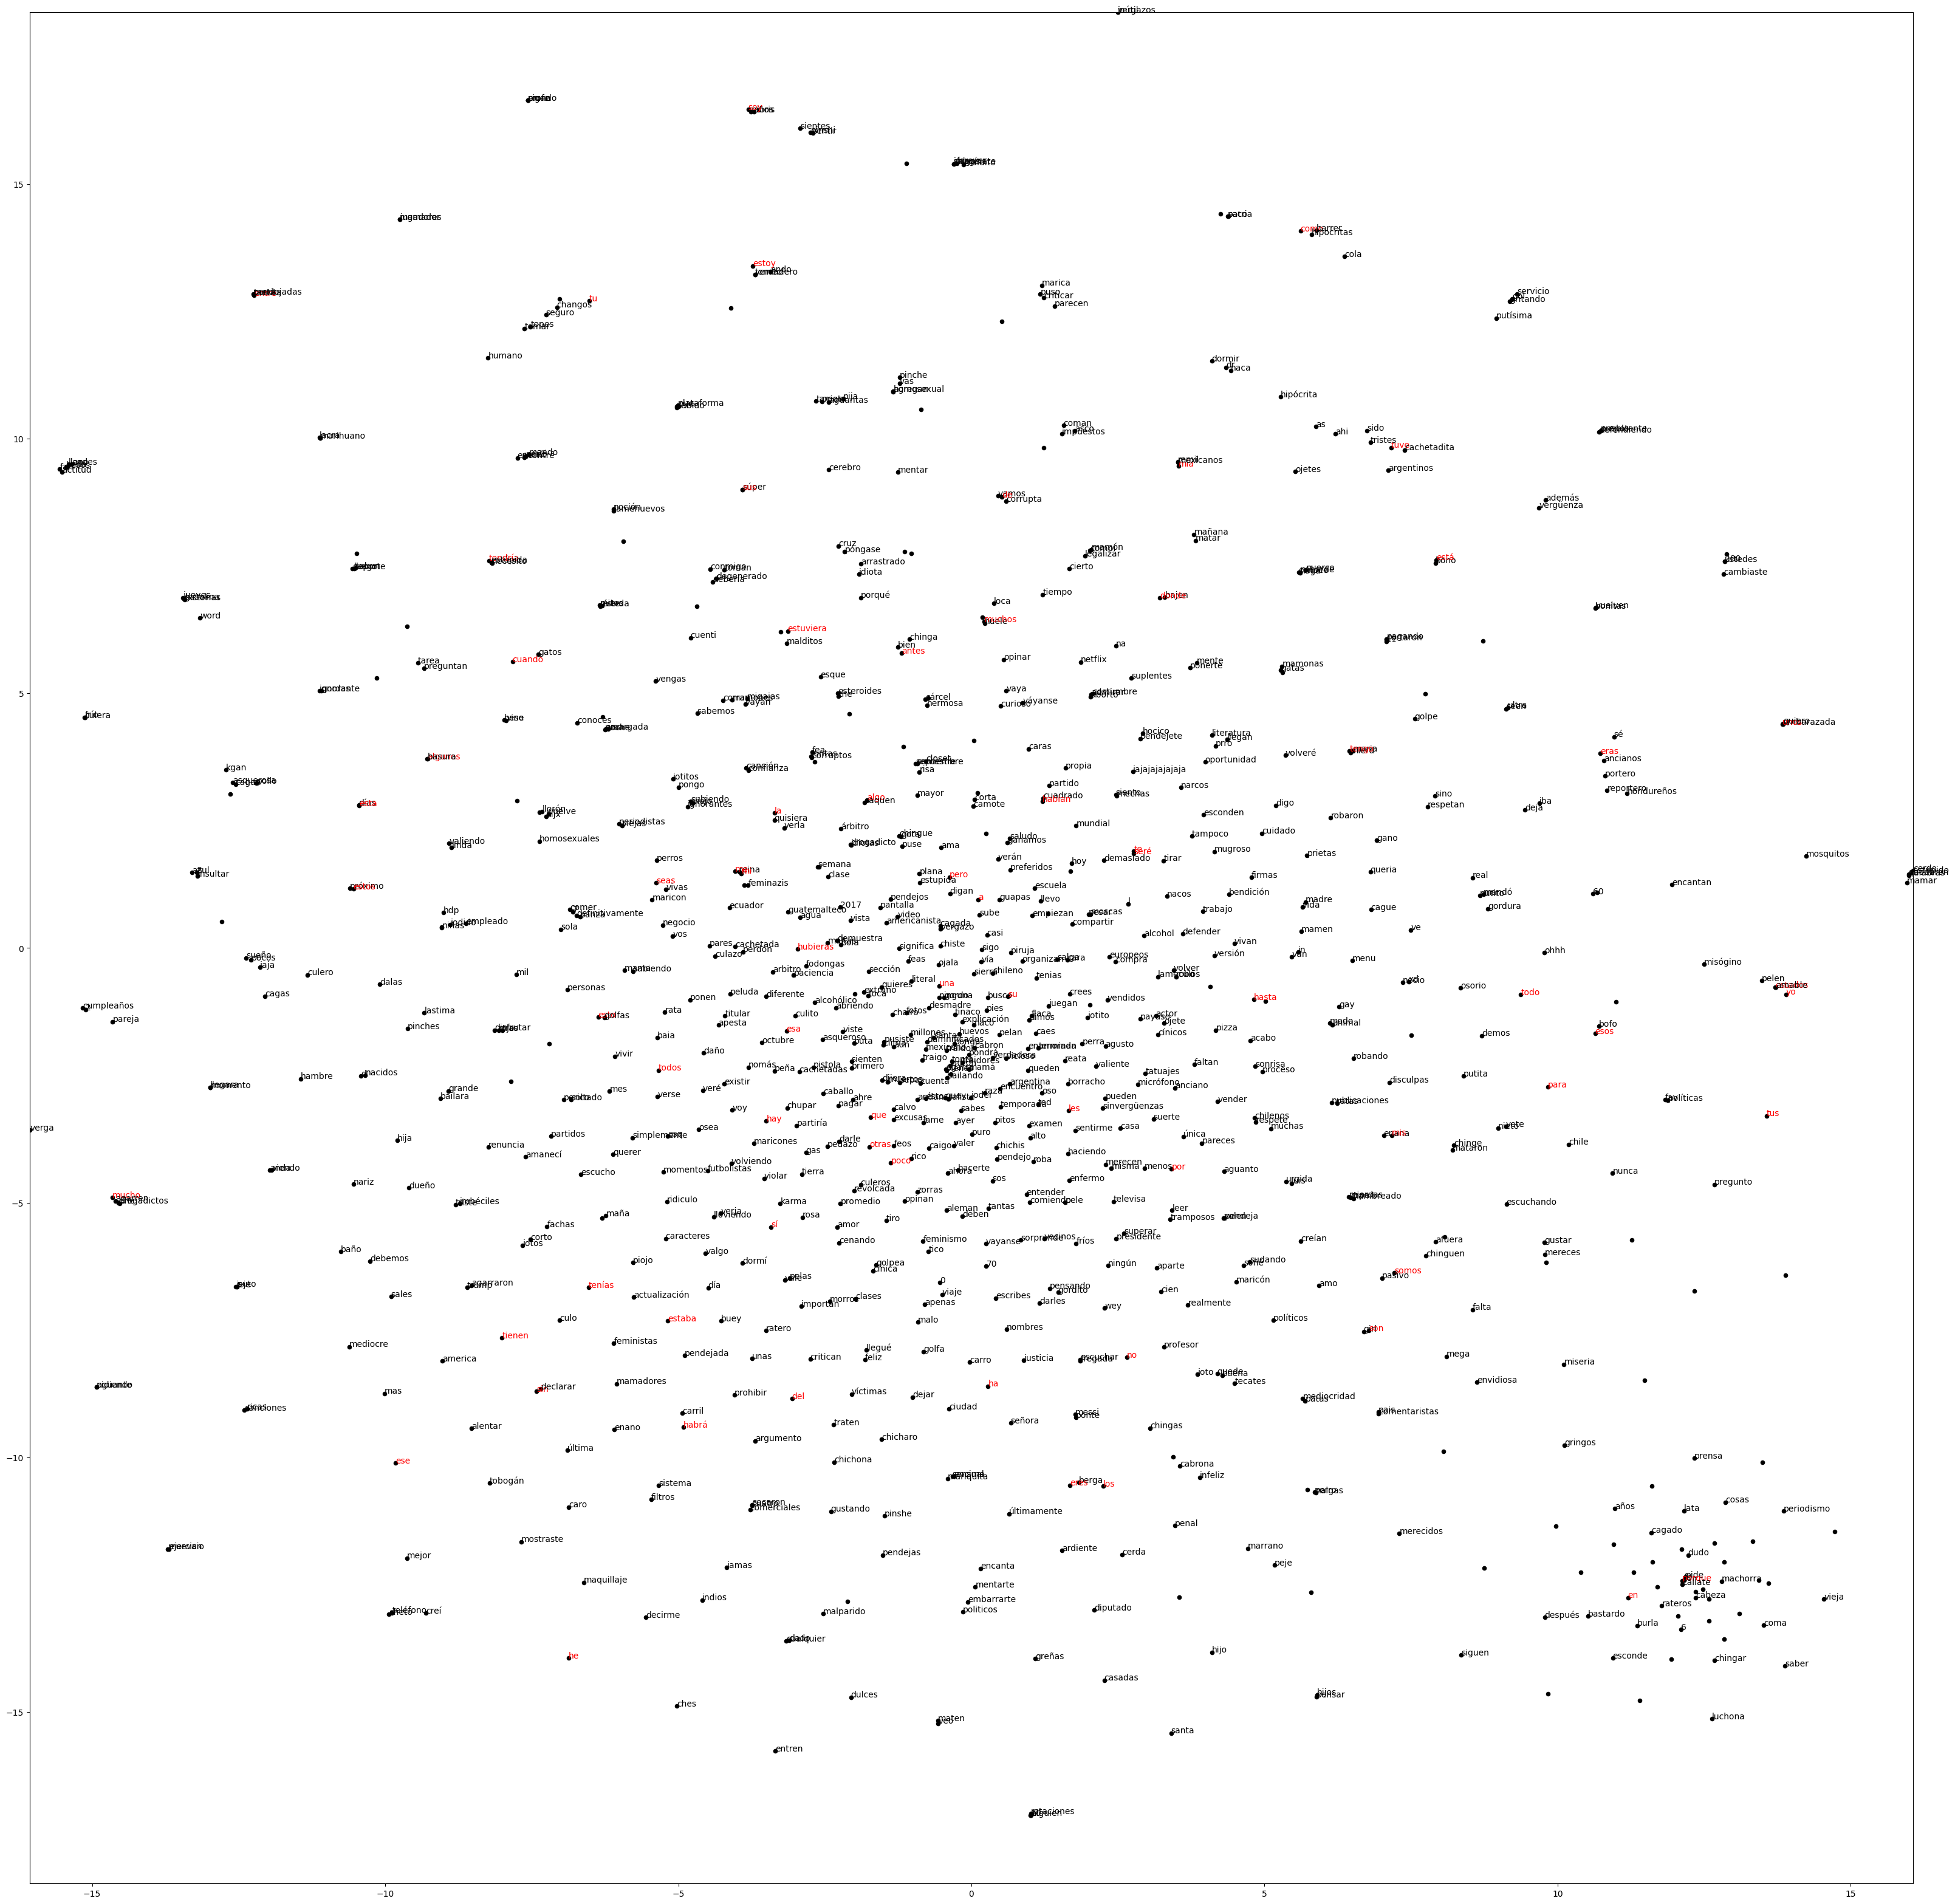

In [31]:

sw = set(stopwords.words('spanish'))
max_x = np.amax(reduced_matrix, axis=0)[0]
max_y = np.amax(reduced_matrix, axis=0)[1]
plt.figure(figsize=(40, 40), dpi=100)
plt.xlim((-max_x, max_x))
plt.ylim((-max_y, max_y))
plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], 20, color='black')

for idx, word in enumerate(t_words):
    x = reduced_matrix[idx, 0]
    y = reduced_matrix[idx, 1]
    if word in sw:
        plt.annotate(word, (x, y), color='red', fontsize=10)
    else:
        plt.annotate(word, (x, y), color='black', fontsize=10)

plt.show()

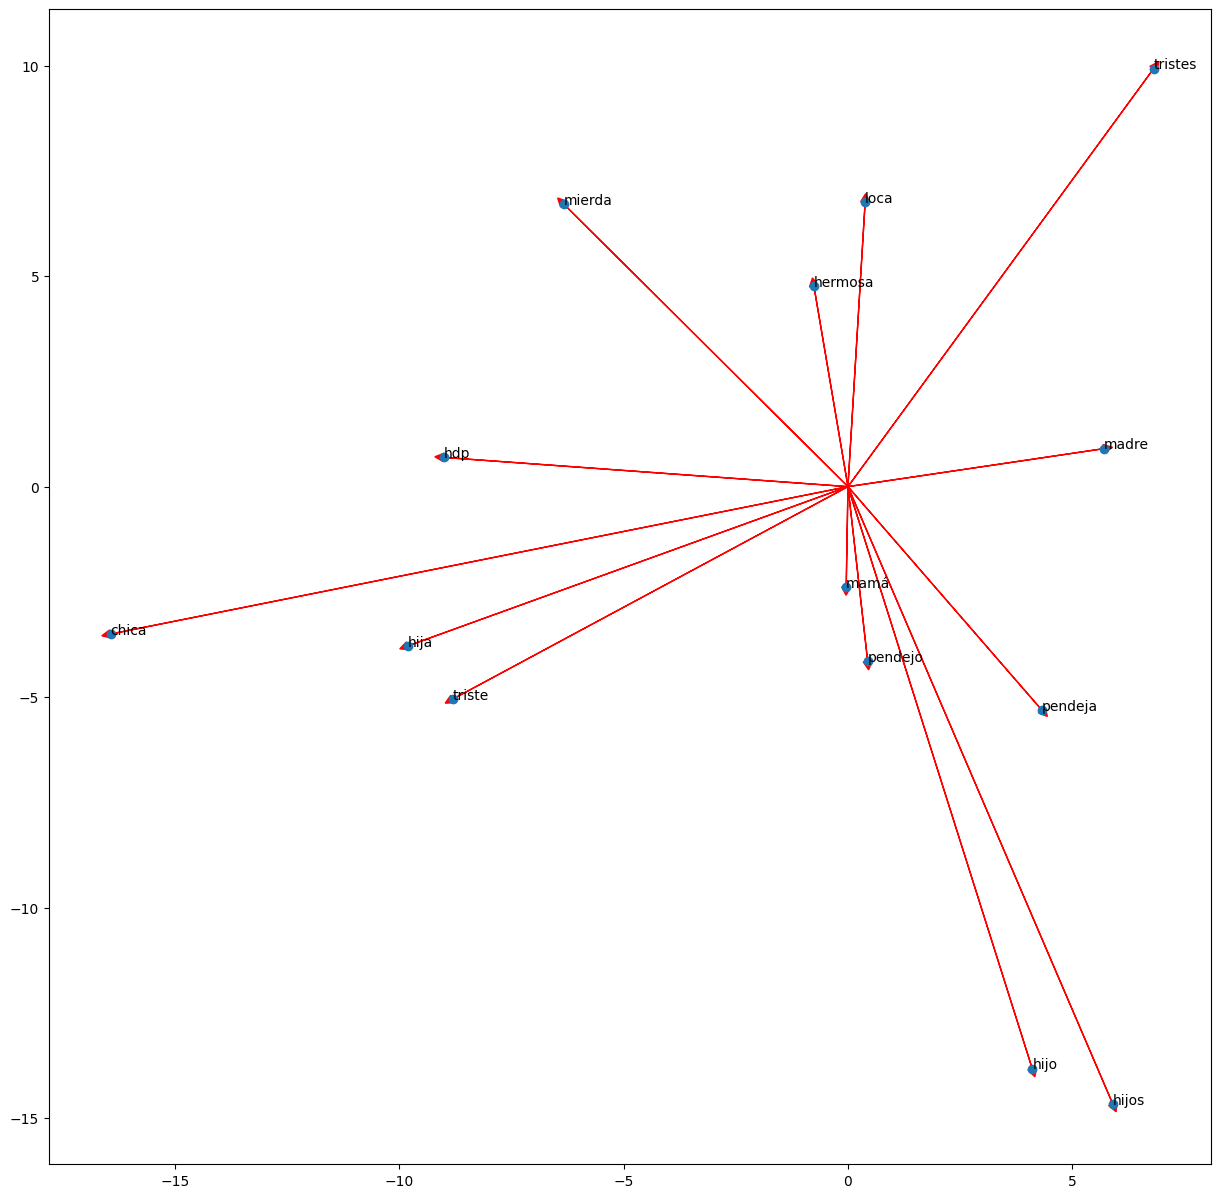

In [32]:
#tambien se puede observar un grupo de palabras
t2=["tristes","triste","alegria","hermosa","chica", "hombres","hdp","madre","madres","@USUARIO","hijos","pendeja","pendejo","mierda","loca","hijo","hija","mamá","tía"] #Faltan palabras
ploter_sw=[]
sb_w=[]
for idx,word in enumerate(t_words[:]):
    if word in t2:
        ploter_sw+=[word]
        sb_w+=[reduced_matrix[idx]]
sb_w=np.array(sb_w)
fig,ax=plt.subplots(figsize=(15,15))
col1=0
col2=1
for word in sb_w:
    ax.arrow(0, 0, word[col1], word[col2], 
             head_width=0.2, head_length=0.2, fc='r', ec='r') 
ax.scatter(sb_w[:,col1],sb_w[:,col2])
for i in range(0,len(ploter_sw)):
    ax.annotate(ploter_sw[i],(sb_w[i,col1],sb_w[i,col2]))